In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


# Removal of Outliers using Boxplot

In [4]:
data.shape

(297, 14)

In [5]:
def  plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

<AxesSubplot:>

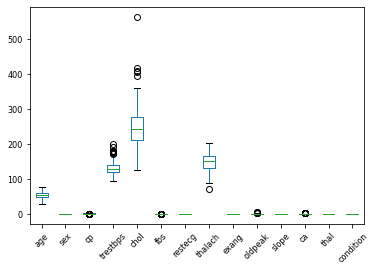

In [6]:
data.boxplot(grid = False, rot = 45, fontsize = 8)

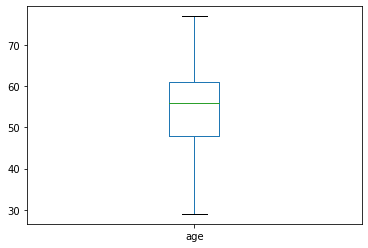

In [7]:
plot_boxplot(data,'age')

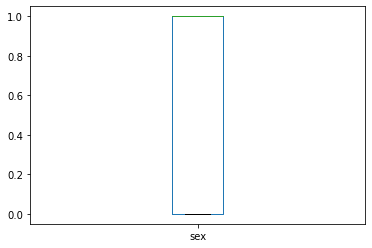

In [8]:
plot_boxplot(data,'sex')

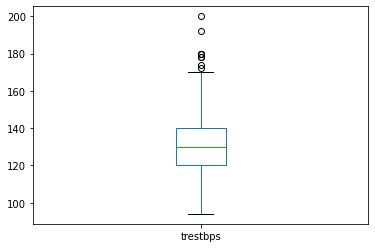

In [9]:
plot_boxplot(data,'trestbps')

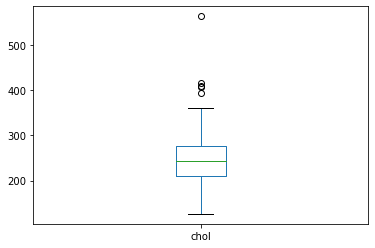

In [10]:
plot_boxplot(data,'chol')

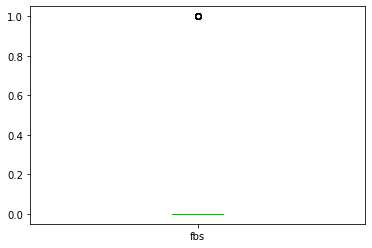

In [11]:
plot_boxplot(data,'fbs')

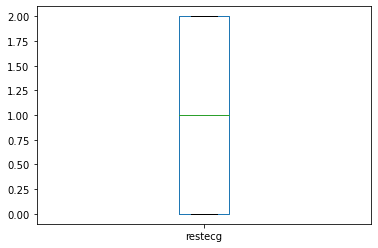

In [12]:
plot_boxplot(data,'restecg')

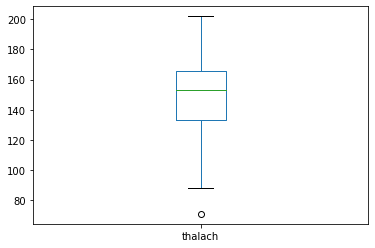

In [13]:
plot_boxplot(data,'thalach')

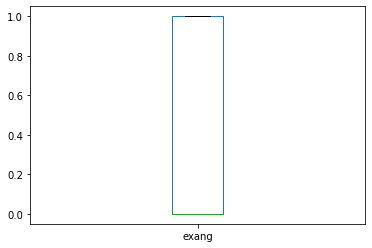

In [14]:
plot_boxplot(data,'exang')

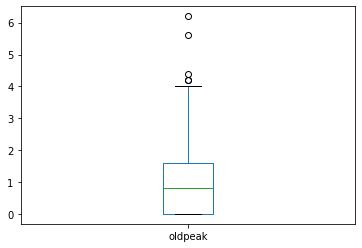

In [15]:
plot_boxplot(data,'oldpeak')

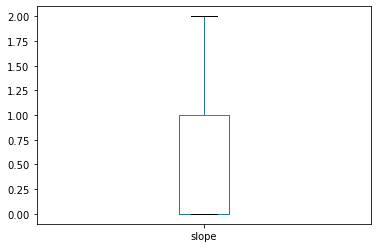

In [16]:
plot_boxplot(data,'slope')

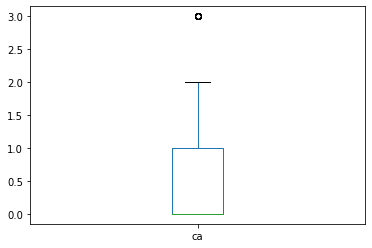

In [17]:
plot_boxplot(data,'ca')

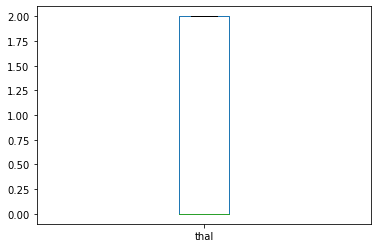

In [18]:
plot_boxplot(data,'thal')

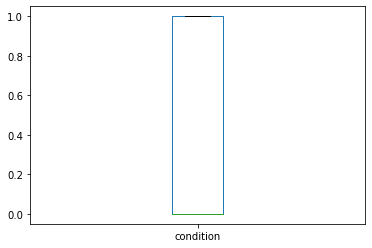

In [19]:
plot_boxplot(data,'condition')

In [20]:
def Outlier(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    lt = df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    return lt

In [21]:
index_list = []
for feature in data.columns:
    index_list.extend(Outlier(data,feature))

In [22]:
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 9,
 45,
 76,
 117,
 167,
 178,
 209,
 234,
 242,
 79,
 83,
 180,
 188,
 238,
 0,
 3,
 6,
 13,
 16,
 29,
 32,
 44,
 48,
 54,
 73,
 76,
 83,
 92,
 95,
 96,
 97,
 102,
 105,
 106,
 110,
 114,
 115,
 117,
 119,
 131,
 144,
 159,
 162,
 167,
 183,
 189,
 203,
 210,
 219,
 225,
 234,
 235,
 236,
 250,
 256,
 269,
 283,
 164,
 9,
 186,
 213,
 239,
 260,
 26,
 75,
 90,
 115,
 128,
 129,
 155,
 158,
 160,
 170,
 180,
 183,
 186,
 189,
 213,
 214,
 225,
 256,
 260,
 277]

In [23]:
def remove(df,lt):
    lt = sorted(set(lt))
    df = df.drop(lt)
    return df

In [24]:
data = remove(data,index_list)

In [25]:
data.shape

(212, 14)

<AxesSubplot:>

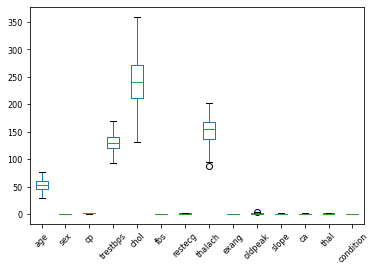

In [26]:
data.boxplot(grid = False, rot = 45, fontsize = 8)

# Handling Missing Values

In [27]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [28]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0,0
24,71,0,1,160,302,0,0,162,0,0.4,0,2,0,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0,0
27,63,0,1,140,195,0,0,179,0,0.0,0,2,0,0
28,62,1,1,120,281,0,2,103,0,1.4,1,1,2,1


# Data Balancing using Synthetic Minority Over-sampling Technique (SMOTE)

In [29]:
data.condition.value_counts()

0    121
1     91
Name: condition, dtype: int64

In [30]:
x = data.drop(['condition'],axis = 1)
y = data.condition
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0
24,71,0,1,160,302,0,0,162,0,0.4,0,2,0
25,70,1,1,156,245,0,2,143,0,0.0,0,0,0
27,63,0,1,140,195,0,0,179,0,0.0,0,2,0
28,62,1,1,120,281,0,2,103,0,1.4,1,1,2


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(169, 13) (169,)
(43, 13) (43,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
model = KNeighborsClassifier()

In [35]:
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [36]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.6511627906976745


col_0,0,1
condition,,
0,14,7
1,8,14


In [38]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [40]:
x_smote_train, y_somte_train = smote.fit_resample(x_train.astype('float'), y_train)

In [41]:
from collections import Counter
print("Before applying SMOTE:", Counter(y_train))
print("After  applying SMOTE:", Counter(y_somte_train))

Before applying SMOTE: Counter({0: 100, 1: 69})
After  applying SMOTE: Counter({0: 100, 1: 100})


# Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
important_features = SelectKBest(score_func = chi2, k = 13)
fit = important_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)
feature_scores = pd.concat([data_columns, data_scores], axis = 1)
feature_scores.columns = ['Attributes', 'Score']

In [44]:
featureScores = feature_scores.sort_values(by = 'Score', ascending = False)
featureScores

,Attributes,Score
7,thalach,131.535824
12,thal,88.419616
9,oldpeak,52.772890
11,ca,47.394584
8,exang,28.556171
0,age,19.289654
10,slope,15.115813
2,cp,12.156599
1,sex,9.347546
6,restecg,7.413737


In [45]:
data = data[['fbs']]

In [46]:
data.head()

,fbs
23,0
24,0
25,0
27,0
28,0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm

#fit a model
lm = lm.LogisticRegression()
model = lm.fit(x_train, y_train)
over = SMOTE(sampling_strategy=0.1)
steps = [('over',over),('model',model)]
pipeline = Pipeline(steps = steps)
x,y = make_classification(n_samples = 10000, n_features = 5, n_redundant = 0, n_clusters_per_class = 1, weights = [0.99], flip_y = 0, random_state = 1)
cv =RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 1)
scores = cross_val_score(pipeline,x,y,scoring = 'roc_auc', cv =cv, n_jobs = -1)
#model.score(x_test, y_test)
print('Mean ROC AUC : %3f' % mean(scores))

C:\Users\Bhavani Omkarini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean ROC AUC : 0.942093


In [48]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits = 5)

#create the sub models
estimators = []
model1 = LogisticRegression().fit(x_test, y_test)
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors = 3)
estimators.append(('cart',model2))

#create the ensemble model
ensemble = VotingClassifier(estimators)

over = SMOTE(sampling_strategy = 0.1)
steps = [('over', over), ('model',ensemble)]
pipeline = Pipeline(steps = steps)

results = model_selection.cross_val_score(pipeline, x, y, cv = kfold)
print(results.mean())


C:\Users\Bhavani Omkarini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9915


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import sklearn.linear_model as lm




# fit a model
lm = lm.LogisticRegression()
model = lm.fit(x_train, y_train)
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#model.score(X_test, y_test)
print('Mean ROC AUC: %.3f' % mean(scores))



C:\Users\Bhavani Omkarini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean ROC AUC: 0.943


In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)


0.7674418604651163


In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred, normalize=True)
)

0.6511627906976745
